https://atcoder.jp/contests/abc054/tasks/abc054_c

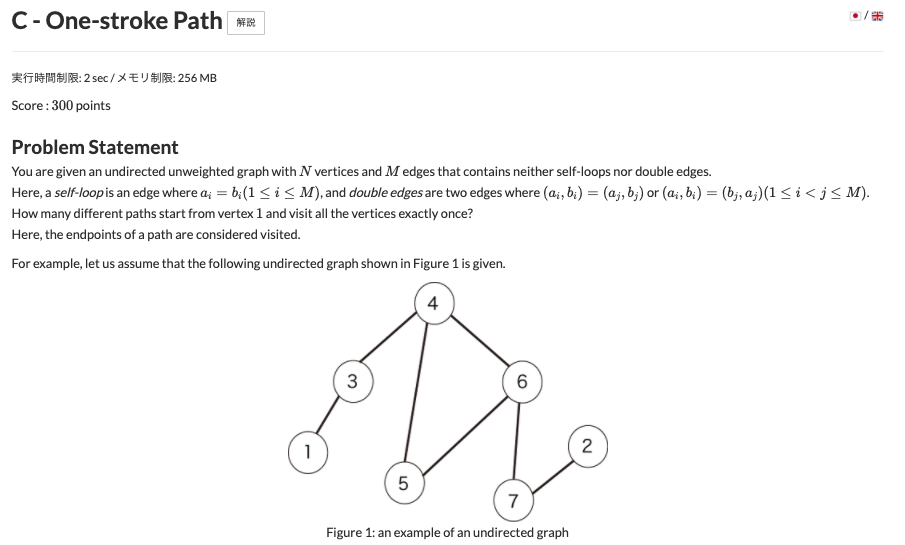

In [3]:
from IPython.display import Image
Image("stroke_1.png",width=900,height=500)

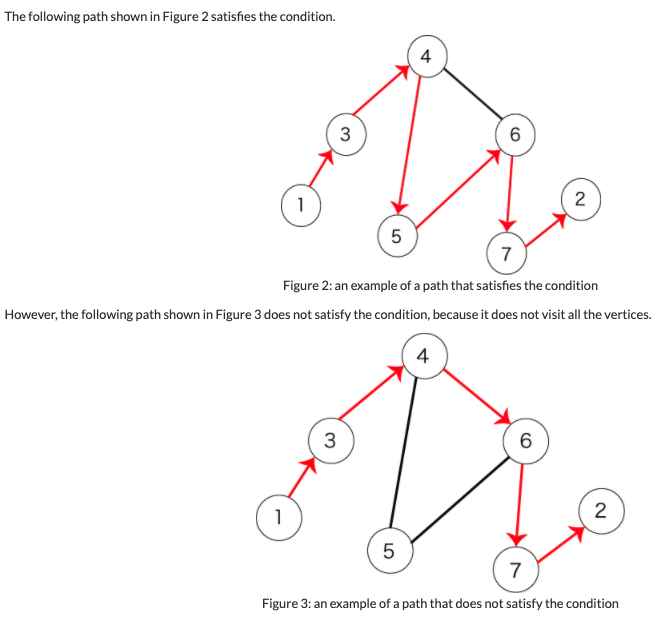

In [2]:
Image("stroke_2.png",width=700,height=500)

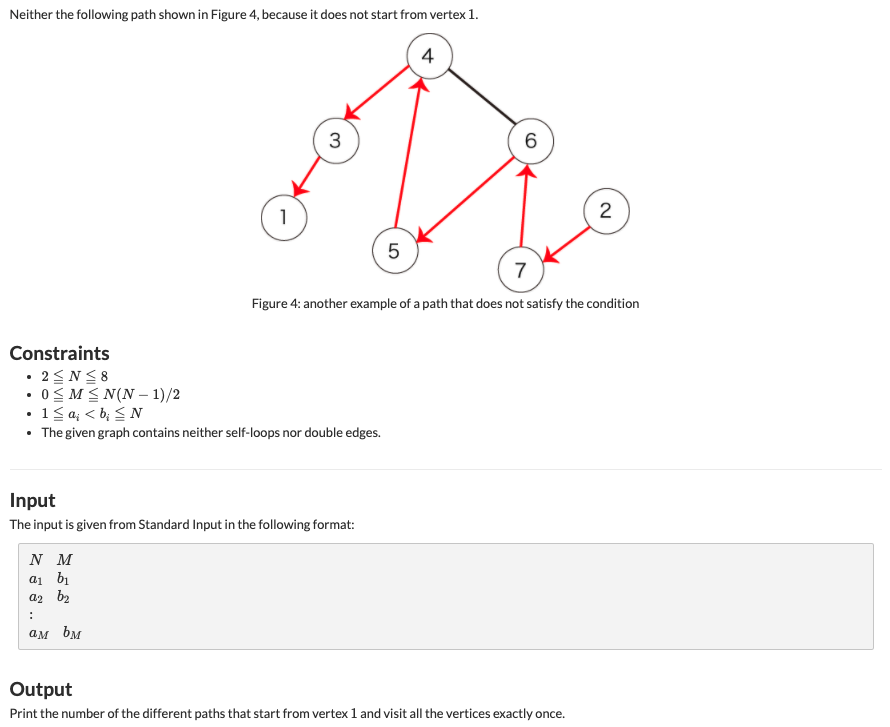

In [5]:
Image("stroke_3.png",width=900,height=500)

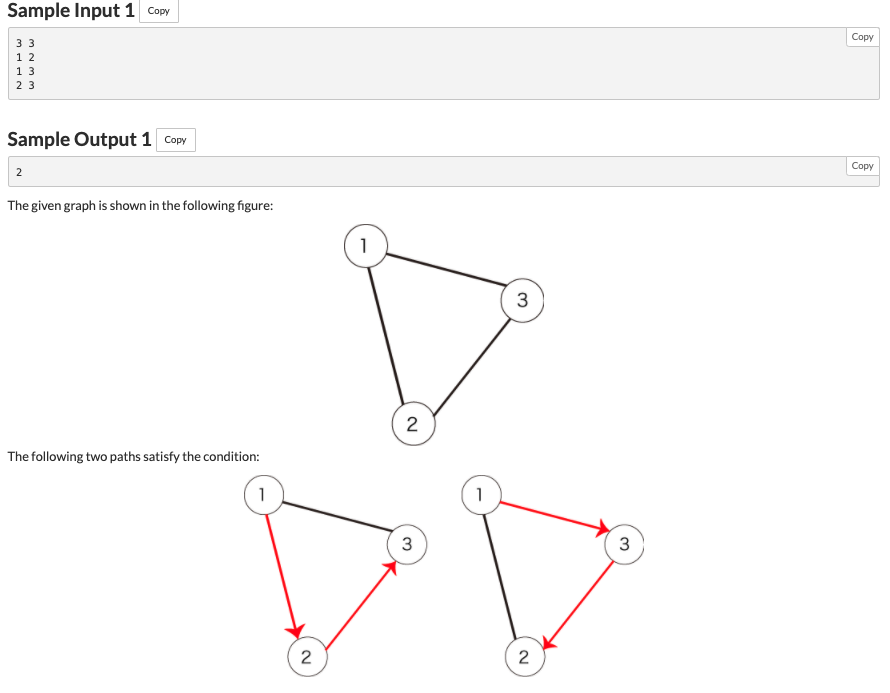

In [7]:
Image("stroke_4.png",width=900,height=500)

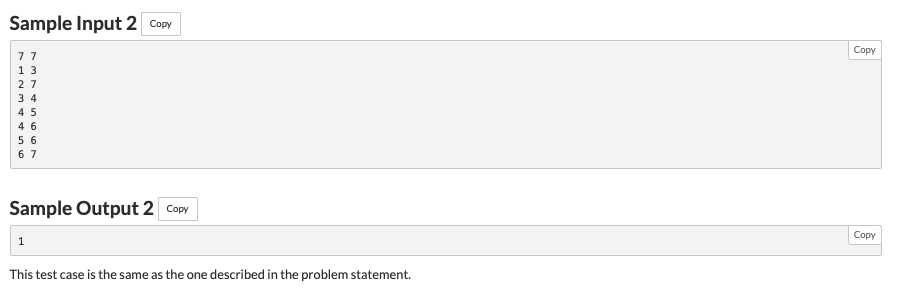

In [8]:
Image("stroke_5.png",width=900,height=500)

https://qiita.com/greenteabiscuit/items/31c46ab3ceac07e749d2

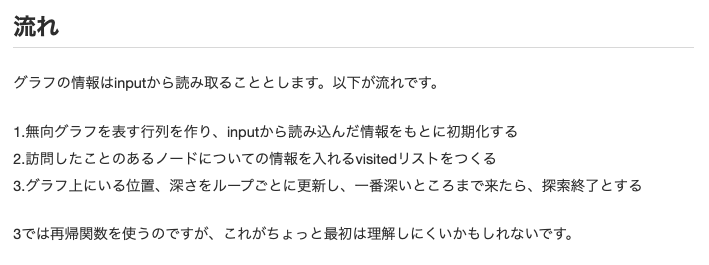

In [9]:
Image("stroke_6.png",width=900,height=500)

In [10]:
#Nはノード数、Mはエッジ数
N, M = map(int, input().split())

path_matrix = []

#無向行列の初期化
for _ in range(N):
    path_matrix.append([False] * N)

#まず無向グラフを表す行列を作る
for _ in range(M):
    line = map(int, input().split())
    paths = [ x-1 for x in line ]
    path_matrix[paths[0]][paths[1]] = True
    path_matrix[paths[1]][paths[0]] = True

#最初はvisited、つまり訪問したことのあるノードはひとつもないので、Falseにする
visited = [False] * N

#再帰関数、ここが難しいかもしれない。
def dfs(now, depth):
    if visited[now]:
        return 0
    if depth == N - 1:
        return 1

    visited[now] = True
    total_paths = 0
    for i in range(0, N):
        if path_matrix[now][i]:
            total_paths += dfs(i, depth + 1)

    visited[now] = False

    return total_paths

print(dfs(0, 0))

 3 3
 1 2
 1 3
 2 3


2


http://prdc.hatenablog.com/entry/2017/10/01/221531

ビット演算

In [11]:
N, M = map(int, input().split())

g = [[] for i in range(N)] #隣接リスト

for i in range(M):
    a, b = map(int, input().split())
    g[a-1].append(b-1)
    g[b-1].append(a-1)

memo = {}
All_used = (1 << N) -1

def dfs(v, used):
    if used == All_used:
        return 1
    
    key = (v, used)
    if key in memo:
        return memo[key]
    
    ans = 0
    for u in g[v]:
        if (used >> u) & 1 == 1: #u番目のビットにフラグが立っているかどうかチェック
            continue
        
        used ^= (1 << u) #u番目のビットのフラグを立てる
        ans += dfs(u, used)
        used ^= (1 << u) #u番目のビットのフラグを戻す
        
    memo[key] = ans
    return ans

print(dfs(0, 1))

 3 3
 1 2
 1 3
 2 3


2


https://drken1215.hatenablog.com/entry/2019/09/16/224600

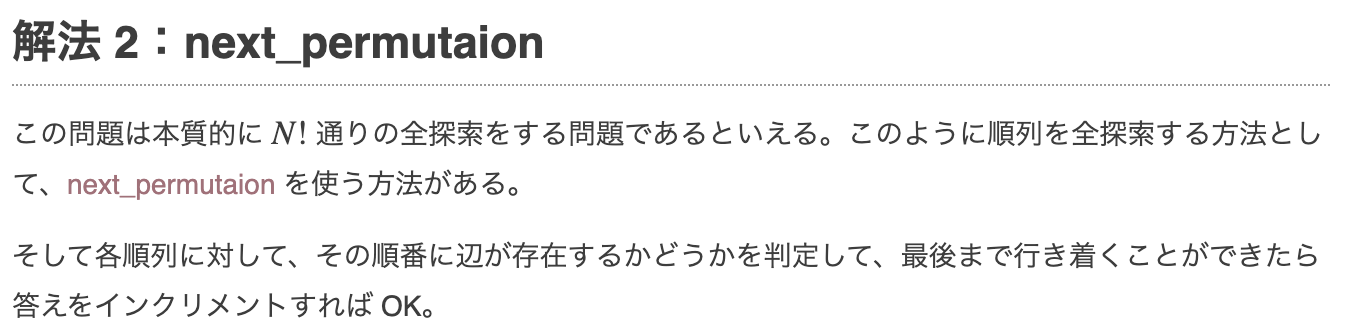

In [12]:
Image("stroke_8.png",width=900,height=500)

In [ ]:
#include <iostream>
#include <vector>
#include <algorithm>
#include <numeric>
using namespace std;

// グラフを隣接行列で管理する
bool G[10][10];

int main() {
    int N, M; cin >> N >> M;
    for (int i = 0; i < M; ++i) {
        int a, b; cin >> a >> b; --a, --b;
        G[a][b] = G[b][a] = true;
    }

    // 順列
    vector<int> ord(N);
    for (int i = 0; i < N; ++i) ord[i] = i;

    // 順列を全部試すa
    int res = 0;
    do {
        if (ord[0] != 0) break;

        bool ok = true;
        for (int i = 0; i + 1 < N; ++i) {
            int from = ord[i];
            int to = ord[i+1];
            if (!G[from][to]) ok = false;
        }
        if (ok) ++res;
    } while (next_permutation(ord.begin(), ord.end()));

    cout << res << endl;
}

Further resource: https://book.mynavi.jp/manatee/detail/id=65960